<a href="https://colab.research.google.com/github/kimdfarm/2025-1-myclass-BDA/blob/main/inclass/10w_B_wed_0507_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 단원 08 그래프 만들기

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [ ]:
%config InlineBackend.figure_format = 'retina'

In [20]:
!pip install koreanize-matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 48.9 MB/s eta 0:00:00


In [80]:
pd.set_option('display.precision', 2)

In [124]:
import pandas as pd

url = 'https://raw.githubusercontent.com/tidyverse/ggplot2/main/data-raw/mpg.csv'
mpg = pd.read_csv(url)
mpg.head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact


In [47]:
! git clone https://github.com/ai7dnn//data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 5.29 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [182]:
mpg = pd.read_csv('data/mpg')
mpg.info()

FileNotFoundError: [Errno 2] No such file or directory: '/data/mpg'

In [127]:
mpg.isna().sum()

,0
manufacturer,0
model,0
displ,0
year,0
cyl,0
trans,0
drv,0
cty,0
hwy,0
fl,0


In [125]:
plt.rcParams['figure.figsize'] = (4,3 )

<Axes: xlabel='displ', ylabel='hwy'>

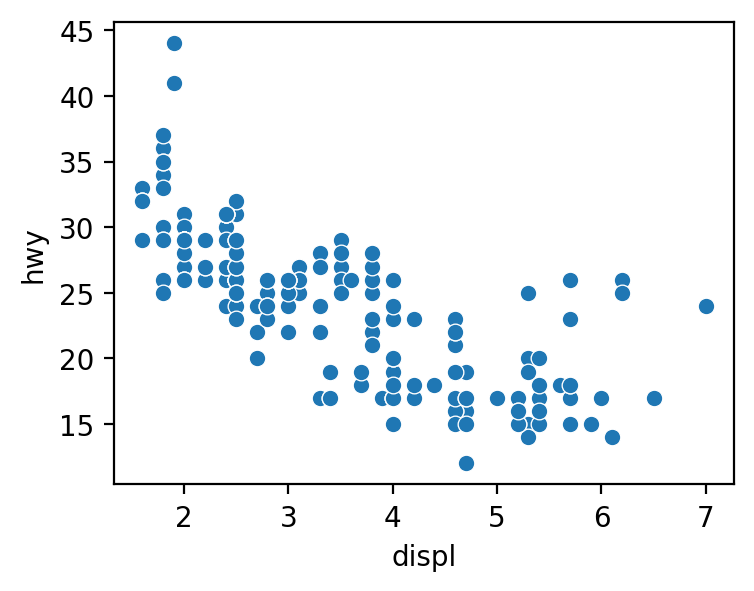

In [134]:
sns.scatterplot(data=mpg, x='displ', y='hwy')


<Axes: xlabel='displ', ylabel='hwy'>

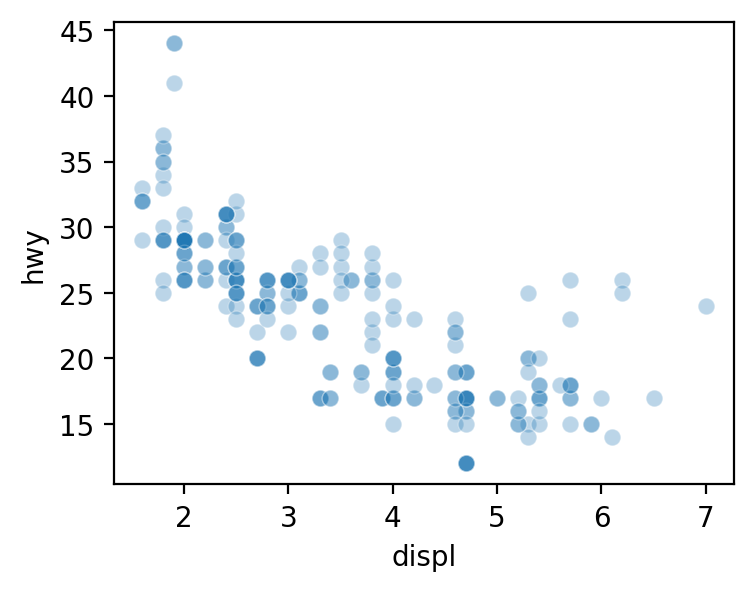

In [135]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3)

[(3.0, 6.0)]

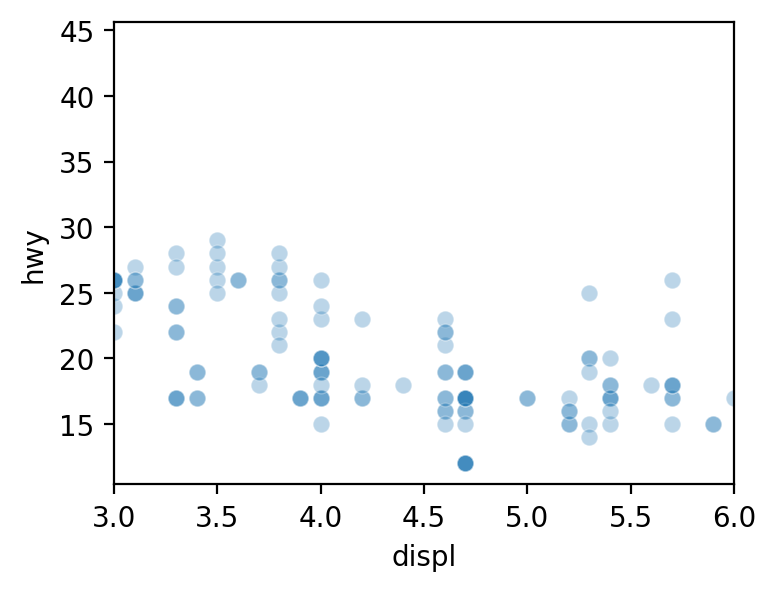

In [136]:

sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3, 6])

[(3.0, 6.0), (15.0, 30.0)]

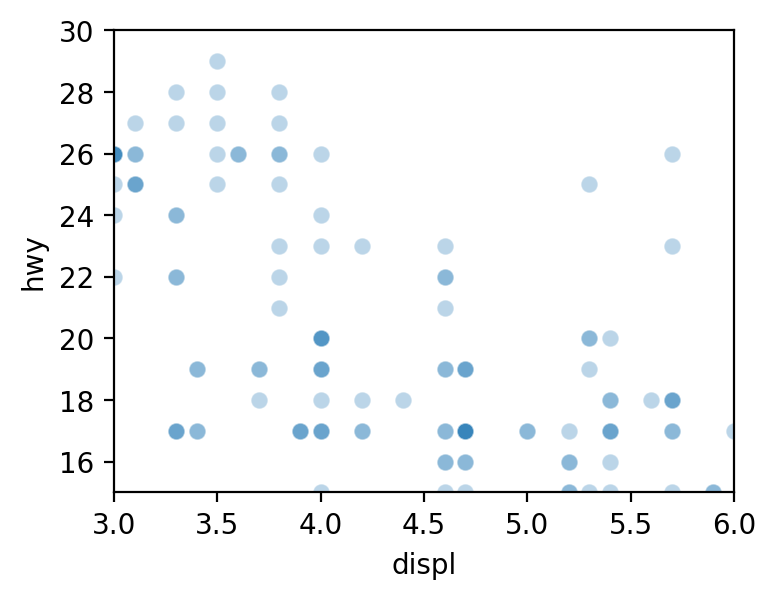

In [138]:
sns.scatterplot(data=mpg, x='displ', y='hwy', alpha=.3).set(xlim=[3, 6], ylim=[15, 30])

<Axes: xlabel='displ', ylabel='hwy'>

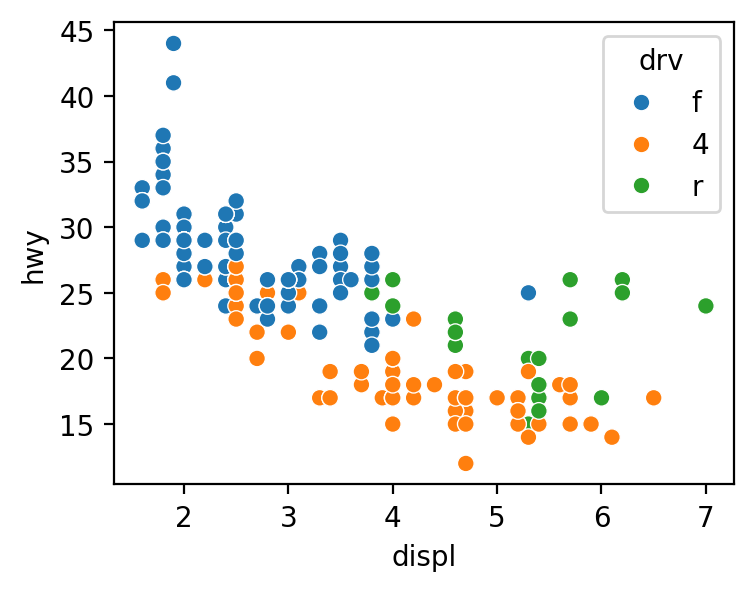

In [139]:

sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')

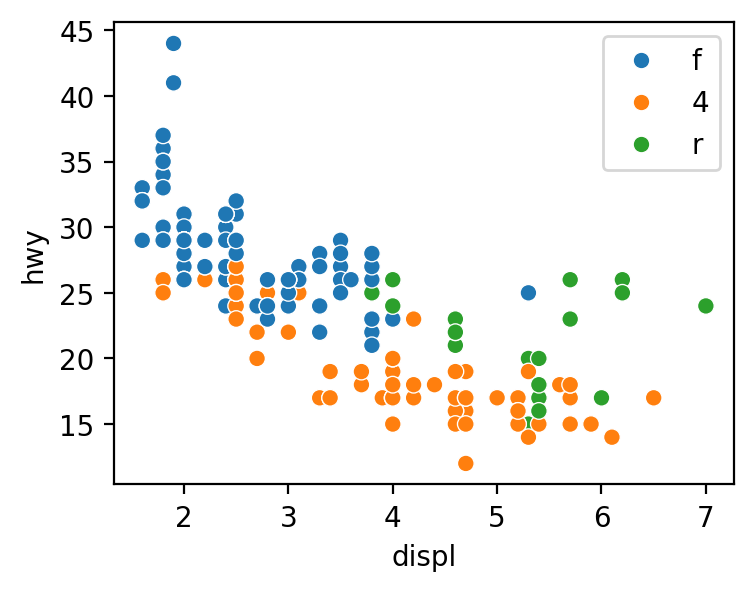

In [140]:
sns.scatterplot(data=mpg, x='displ', y='hwy', hue='drv')
plt.legend(loc='upper right')

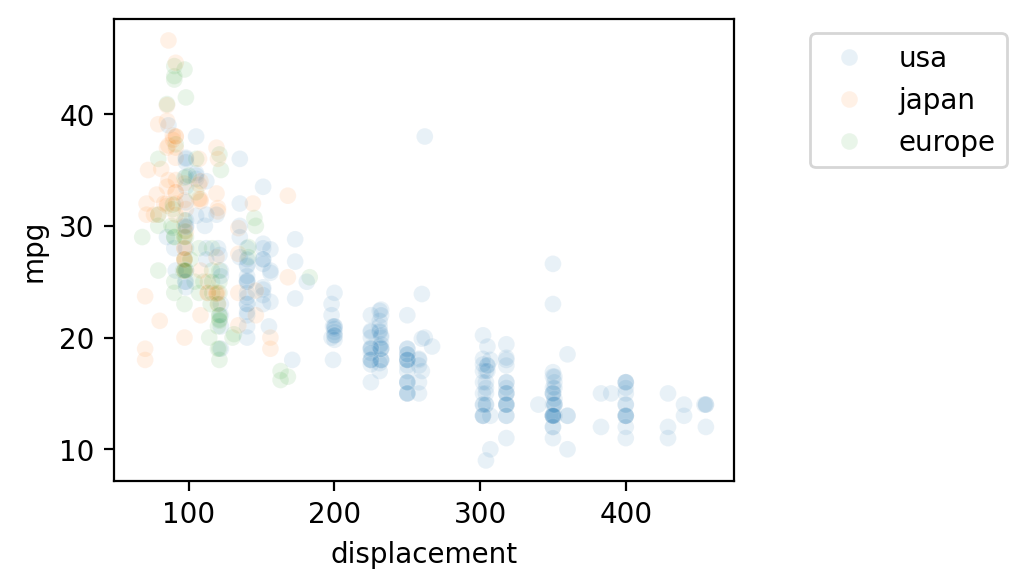

In [70]:
sns.scatterplot(data=mpg, x='displacement', y='mpg', hue='origin', alpha=0.1)
plt.legend(loc='upper left' , bbox_to_anchor=(1.1,1))

| 숫자 | 위치 설명        | 시각적 위치      |
| -- | ------------ | ----------- |
| 1  | upper right  | 오른쪽 위       |
| 2  | upper left   | 왼쪽 위        |
| 3  | lower left   | 왼쪽 아래       |
| 4  | lower right  | 오른쪽 아래      |
| 5  | right        | 오른쪽 중간 (세로) |
| 6  | center left  | 왼쪽 중간 (세로)  |
| 7  | center right | 오른쪽 중간 (세로) |
| 8  | lower center | 아래 중앙       |
| 9  | upper center | 위 중앙        |
| 10 | center       | 정중앙 (가운데)   |


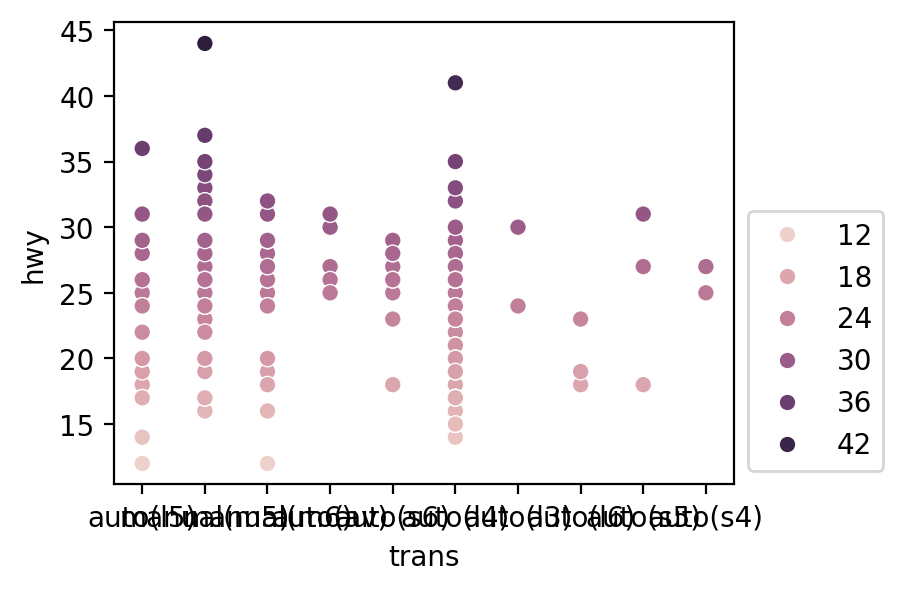

In [141]:

sns.scatterplot(data=mpg, x='trans', y='hwy', hue='hwy')
plt.legend(loc='lower left', bbox_to_anchor=[1, 0])

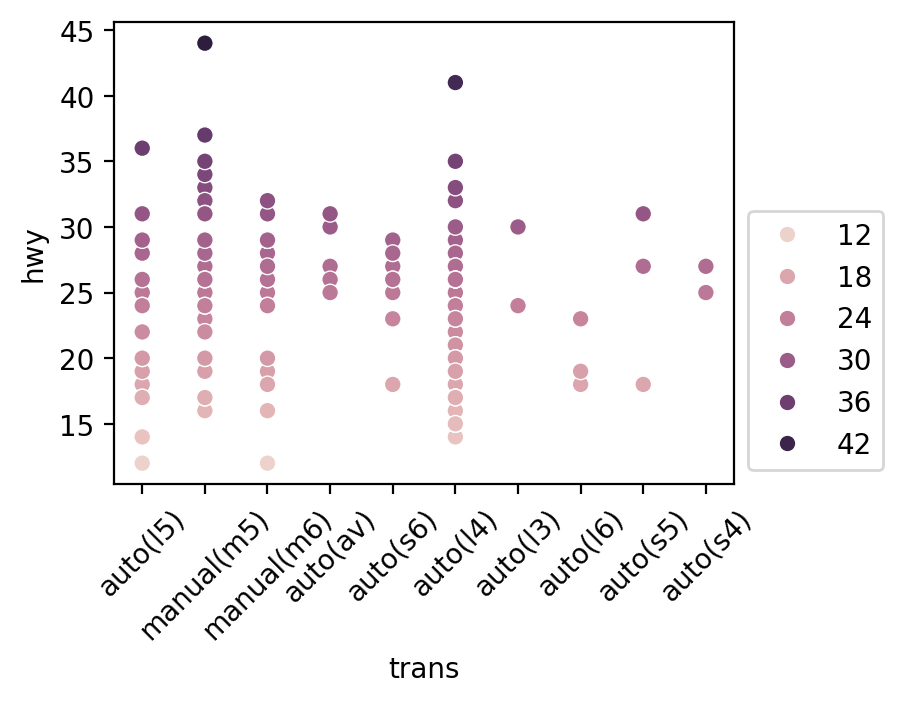

In [142]:


myPlot = sns.scatterplot(data=mpg, x='trans', y='hwy', hue='hwy')
myPlot.tick_params(axis='x', labelrotation=45)
myPlot.legend(loc='lower left', bbox_to_anchor=[1, 0])

In [90]:
df_mpg = mpg.groupby('drv').agg(mean_hwy = ('hwy', 'mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


<Axes: xlabel='drv', ylabel='mean_hwy'>

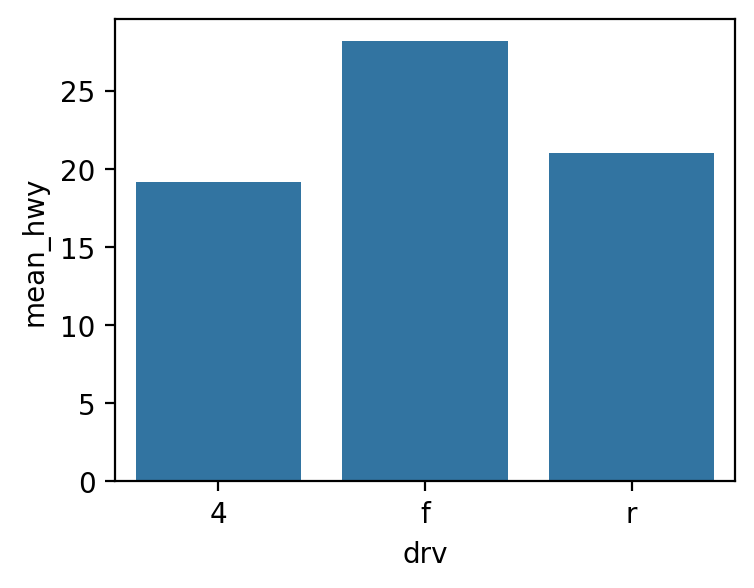

In [88]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy')

<Axes: xlabel='drv', ylabel='mean_hwy'>

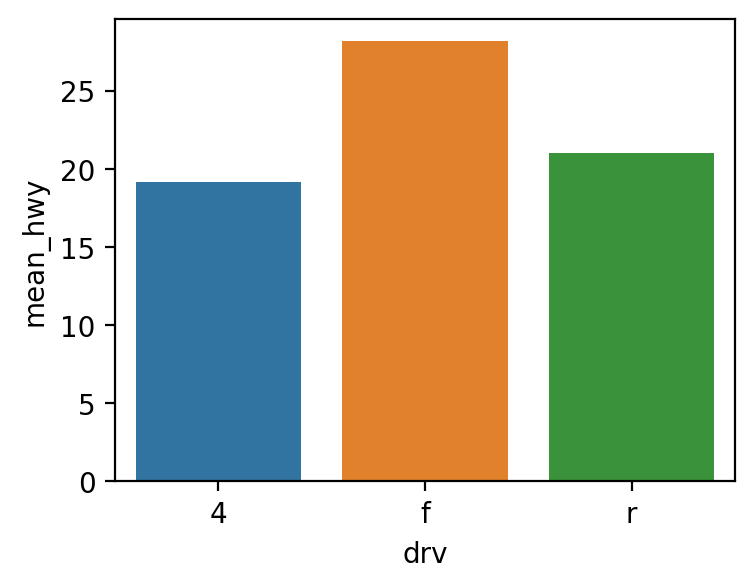

In [92]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy' , hue='drv')


<Axes: xlabel='drv', ylabel='mean_hwy'>

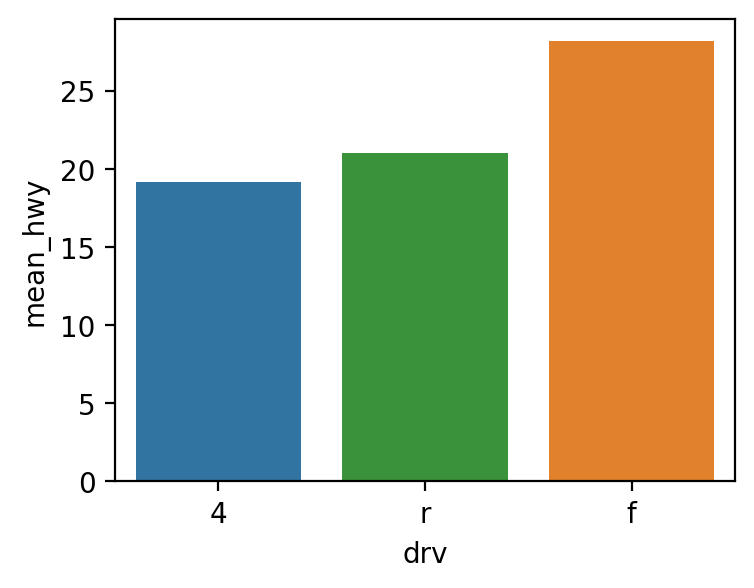

In [93]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy' , hue='drv' , order={'f' , 'r' , '4'})

<Axes: xlabel='drv', ylabel='hwy'>

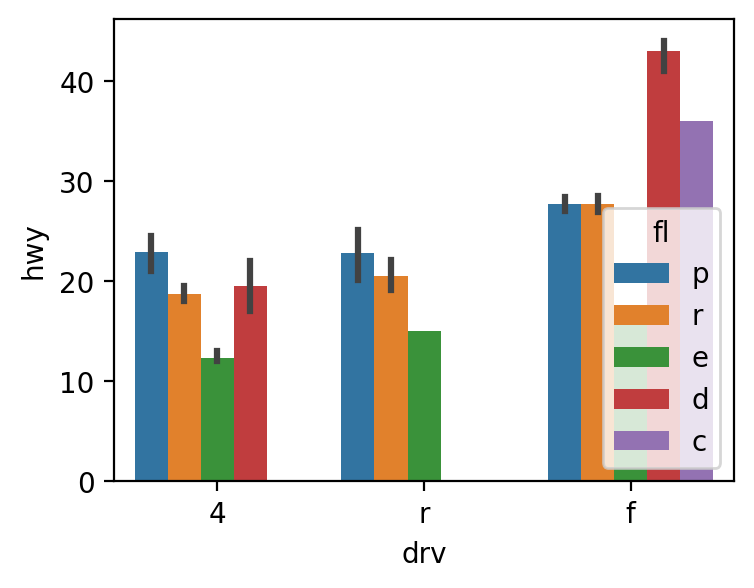

In [98]:
sns.barplot(data=mpg, x='drv', y='hwy' , hue='fl' , order={'f' , 'r' , '4'})


In [100]:
mpg.groupby('drv', as_index=False).count()[['drv','model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [103]:
mpg.groupby('drv', as_index=False).count()[['drv','model']].rename(columns={'model':'count'})

,drv,count
0,4,103
1,f,106
2,r,25


In [104]:
mpg.groupby('drv', as_index=False).count()[['drv','model']].rename(columns={'model':'n'})


,drv,n
0,4,103
1,f,106
2,r,25


In [109]:
df_mpg = mpg.groupby('drv', as_index=False).agg(n = ('drv' , 'count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


In [110]:
df_mpg2 = mpg.groupby('drv').agg(n = ('drv' , 'count'))
df_mpg2

,n
drv,
4,103
f,106
r,25


<Axes: xlabel='drv', ylabel='n'>

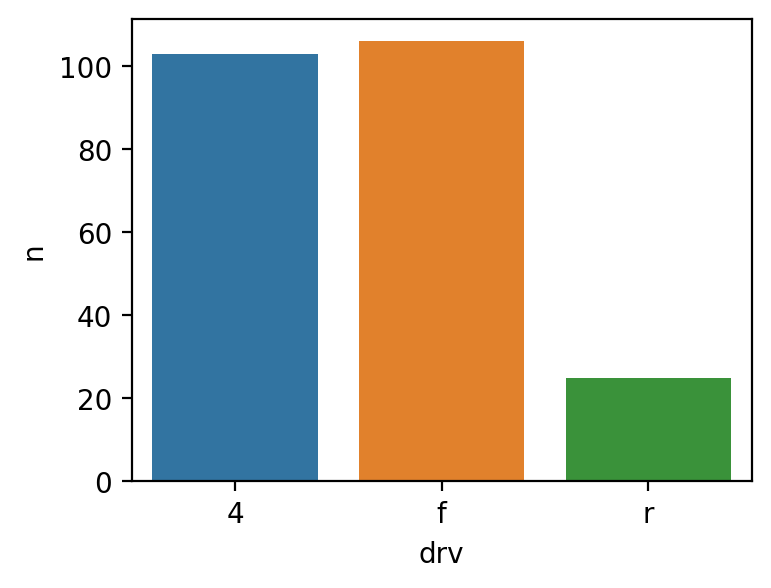

In [112]:
sns.barplot(data=df_mpg, x='drv', y='n',hue = 'drv')

<Axes: xlabel='drv', ylabel='count'>

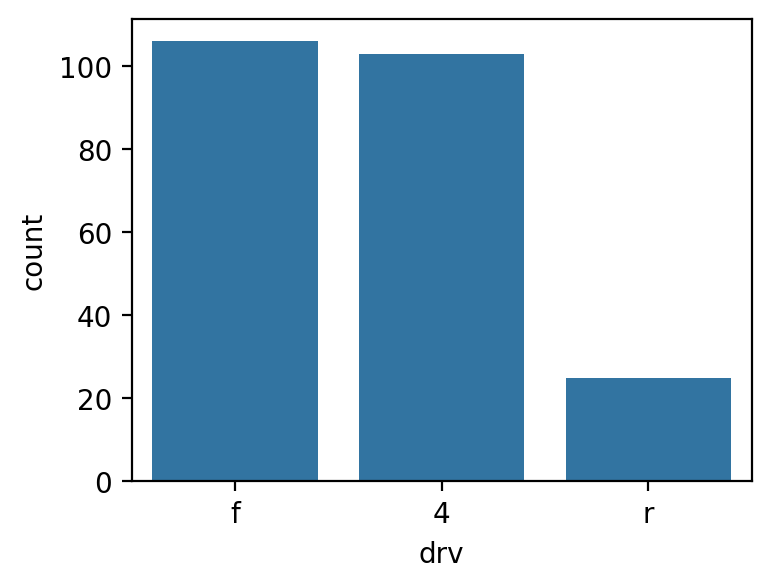

In [114]:
sns.countplot(data=mpg, x='drv')

<Axes: xlabel='drv', ylabel='count'>

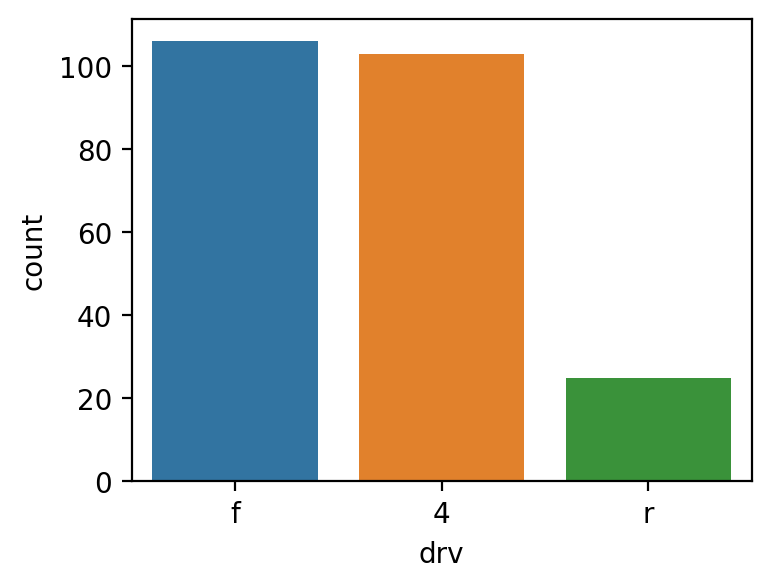

In [115]:
sns.countplot(data=mpg, x='drv',hue='drv')

In [131]:
mpg.drv.value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

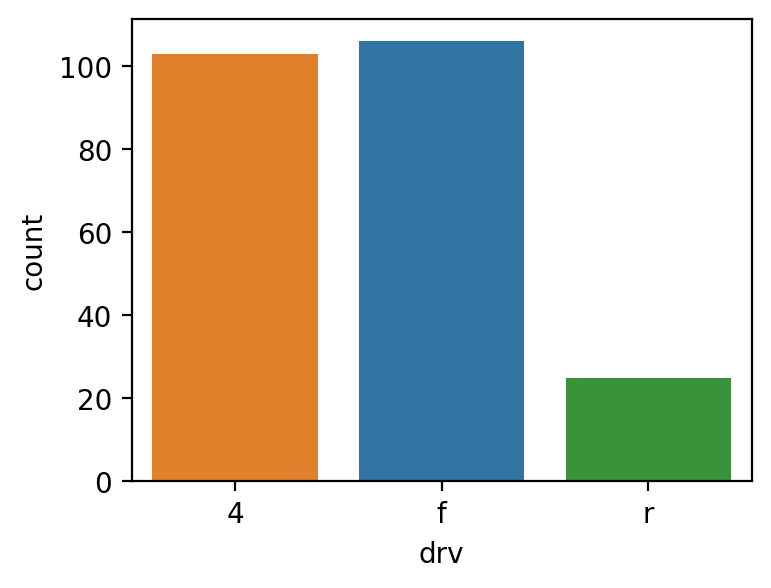

In [132]:
sns.countplot(data=mpg, x='drv',hue='drv',order=['4','f', 'r'])

In [143]:
!rm -r data

In [144]:
!git clone https://github.com/ai7dnn//data

Cloning into 'data'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 2.15 MiB | 5.41 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [165]:
eco =pd.read_csv('data/economics.csv')
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


### 열 설명:
- date: 날짜 (연-월-일 형식, 월별 데이터)

- pce (Personal Consumption Expenditures): 개인 소비 지출

- pop: 인구 수 (단위: 천 명)

- psavert (Personal Saving Rate): 개인 저축률 (%)

- uempmed (Median Duration of Unemployment): 실업자의 중위 실업 기간 (주 단위)

- unemploy: 실업자 수 (단위: 천 명)

In [147]:
eco.head()

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [148]:
eco.shape

(574, 6)

<Axes: xlabel='date', ylabel='unemploy'>

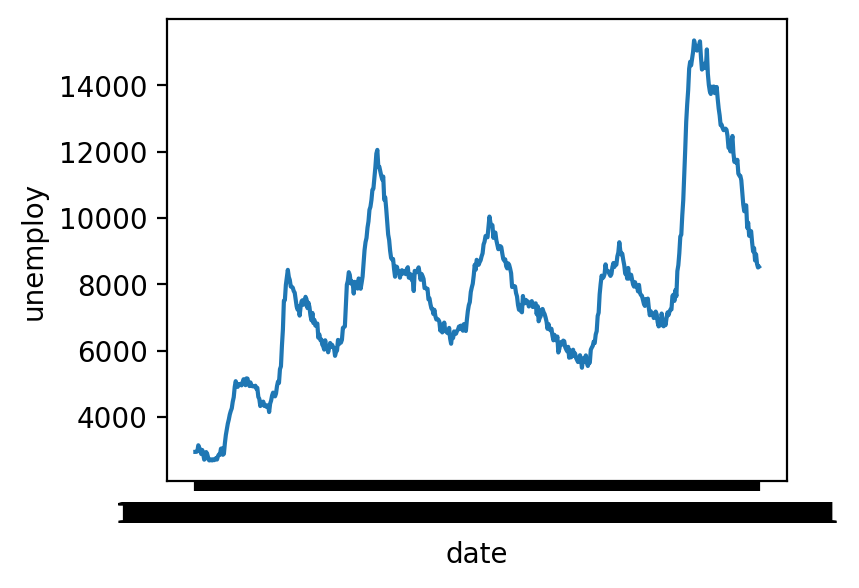

In [150]:
sns.lineplot(data=eco, x='date', y='unemploy')

<Axes: xlabel='date', ylabel='unemploy'>

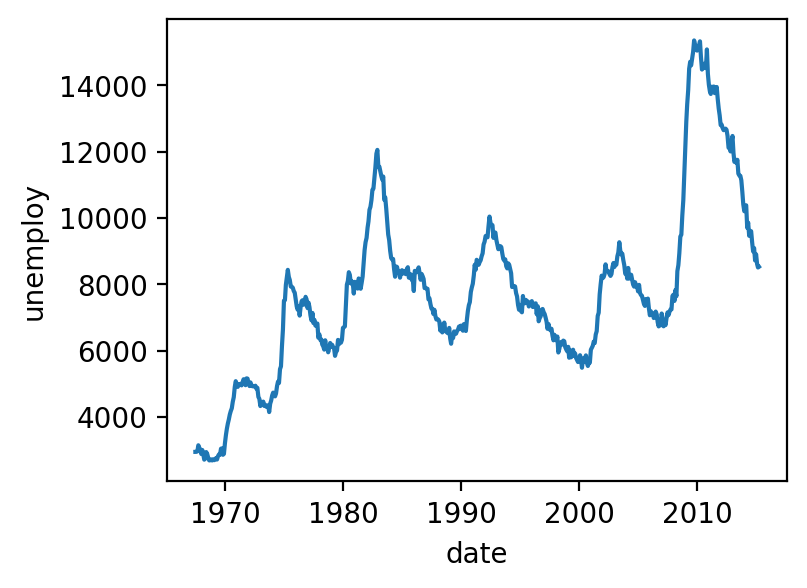

In [151]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='unemploy')

<Axes: xlabel='date', ylabel='psavert'>

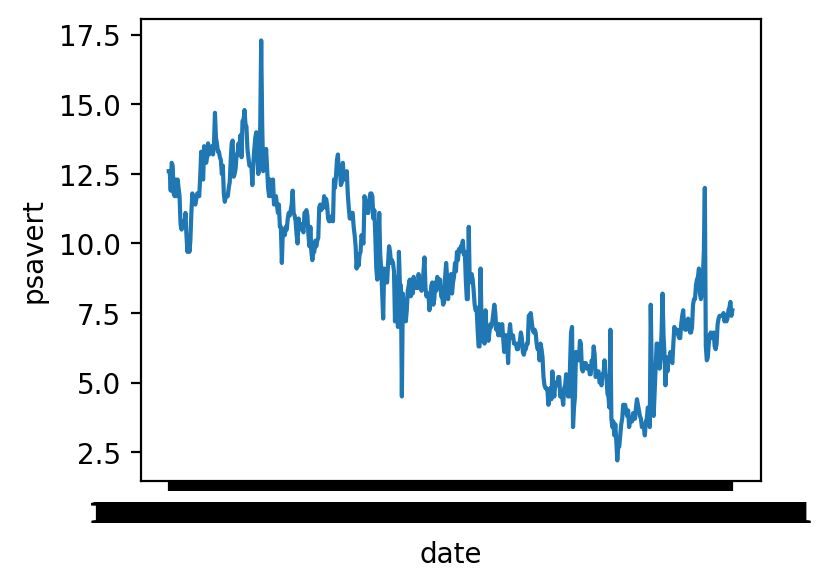

In [152]:
sns.lineplot(data=eco, x='date', y='psavert')


<Axes: xlabel='date', ylabel='psavert'>

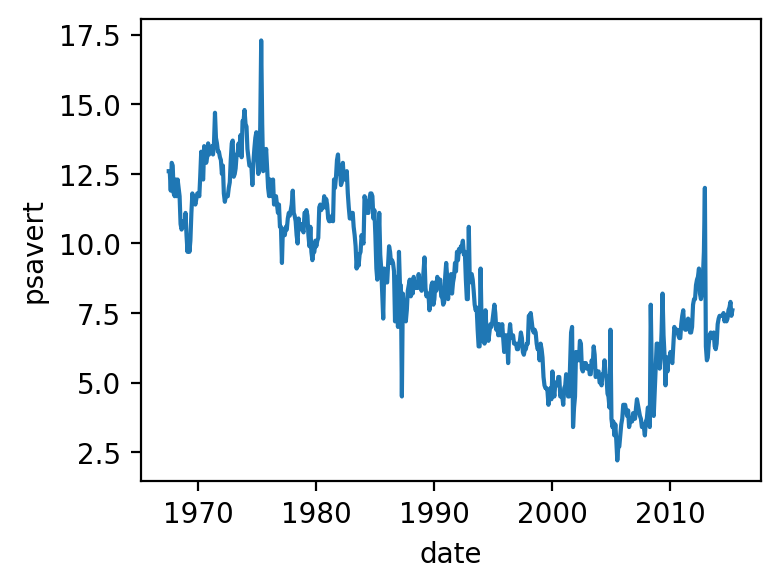

In [154]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='psavert')

<Axes: xlabel='date', ylabel='pce'>

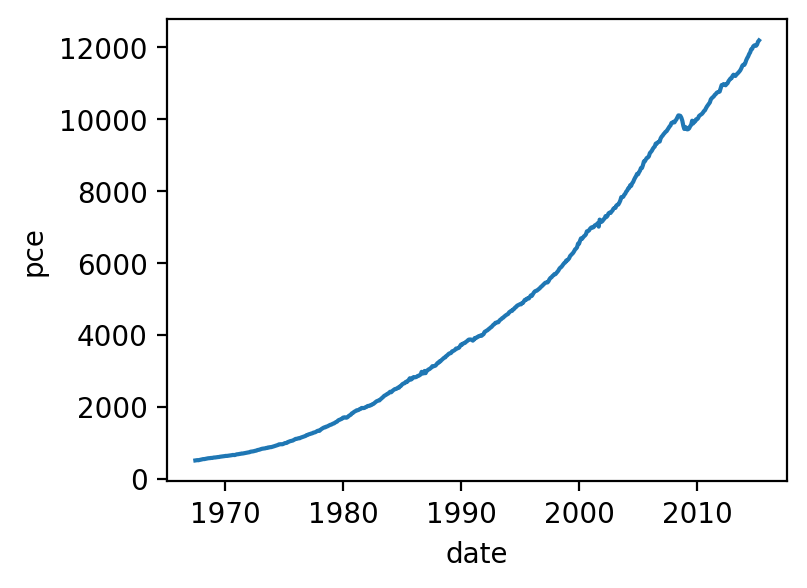

In [156]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='pce')

In [157]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [167]:
eco['date2'] = pd.to_datetime(eco['date'])
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [168]:
eco[['date' , 'date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [169]:
eco.date2.dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [170]:
eco.date2.dt.month

,date2
0,7
1,8
2,9
3,10
4,11
...,...
569,12
570,1
571,2
572,3


In [171]:
eco.date2.dt.day

,date2
0,1
1,1
2,1
3,1
4,1
...,...
569,1
570,1
571,1
572,1


In [172]:
eco['year'] = eco['date2'].dt.year
eco['month'] = eco['date2'].dt.month
eco['day'] = eco['date2'].dt.day

In [173]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
 9   day       574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(3), int64(1), object(1)
memory usage: 38.2+ KB


<Axes: xlabel='year', ylabel='unemploy'>

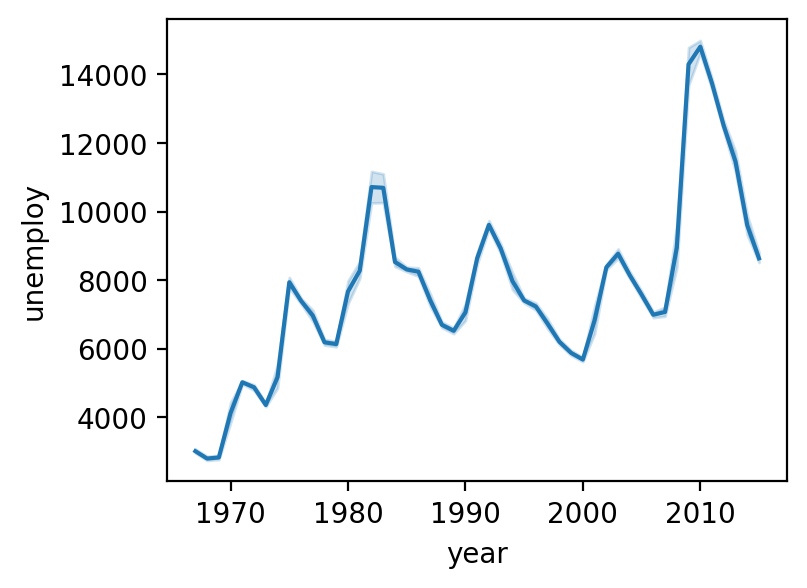

In [174]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

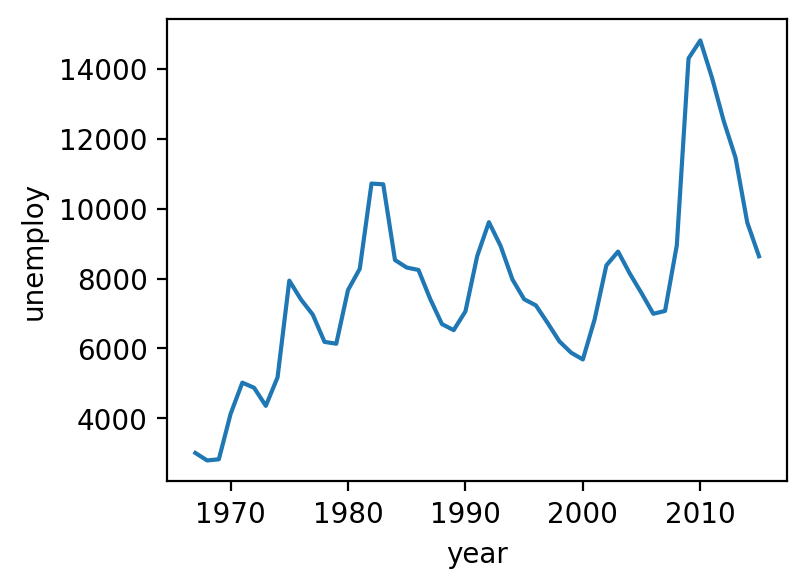

In [176]:
sns.lineplot(data=eco, x=eco['year'], y='unemploy',errorbar=None)

<Axes: xlabel='drv', ylabel='hwy'>

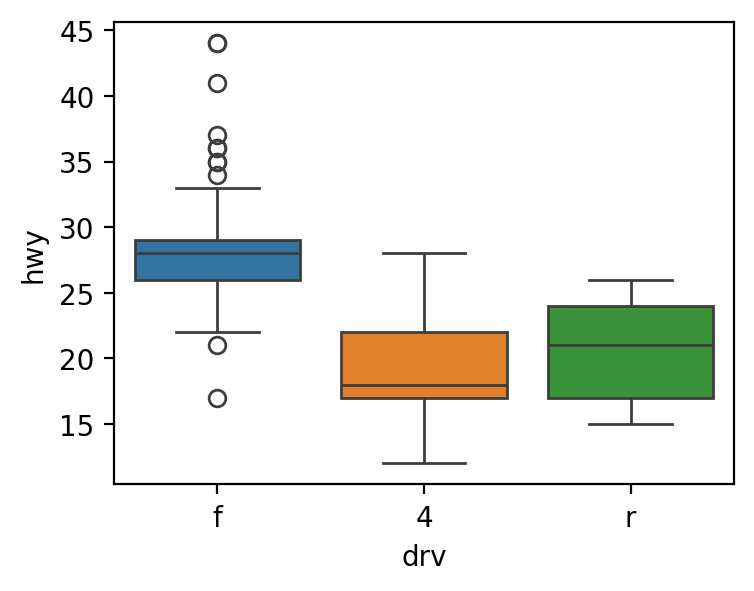

In [177]:
sns.boxplot(mpg, x='drv', y='hwy', hue='drv')

In [183]:
mpg =pd.read_csv('data/mpg.csv')


<Axes: xlabel='category', ylabel='hwy'>

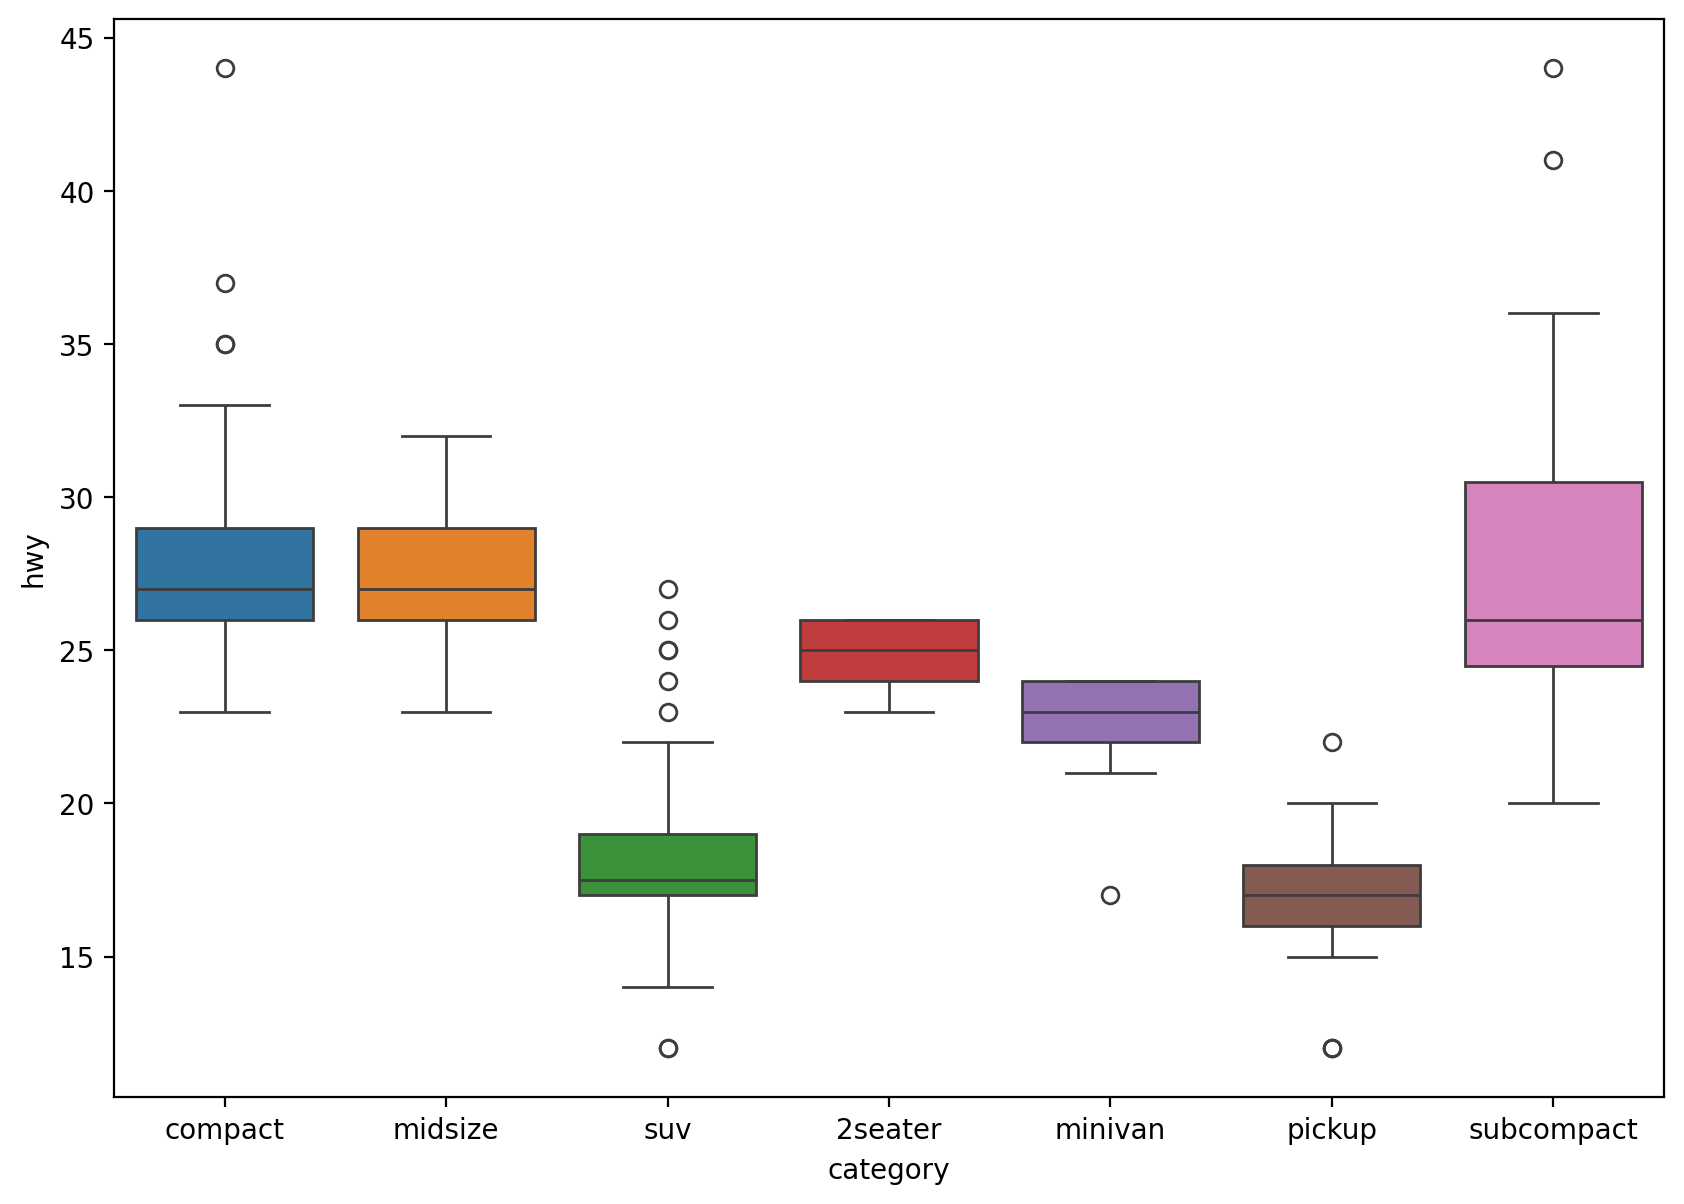

In [188]:
sns.boxplot(mpg, x='category', y='hwy', hue='category')

In [187]:
plt.rcParams['figure.figsize'] = (10,7)

In [190]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [197]:
mpg.query(" fl =='e'")

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [202]:
mpg[mpg['fl'] == 'e']


,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


<Axes: xlabel='category', ylabel='hwy'>

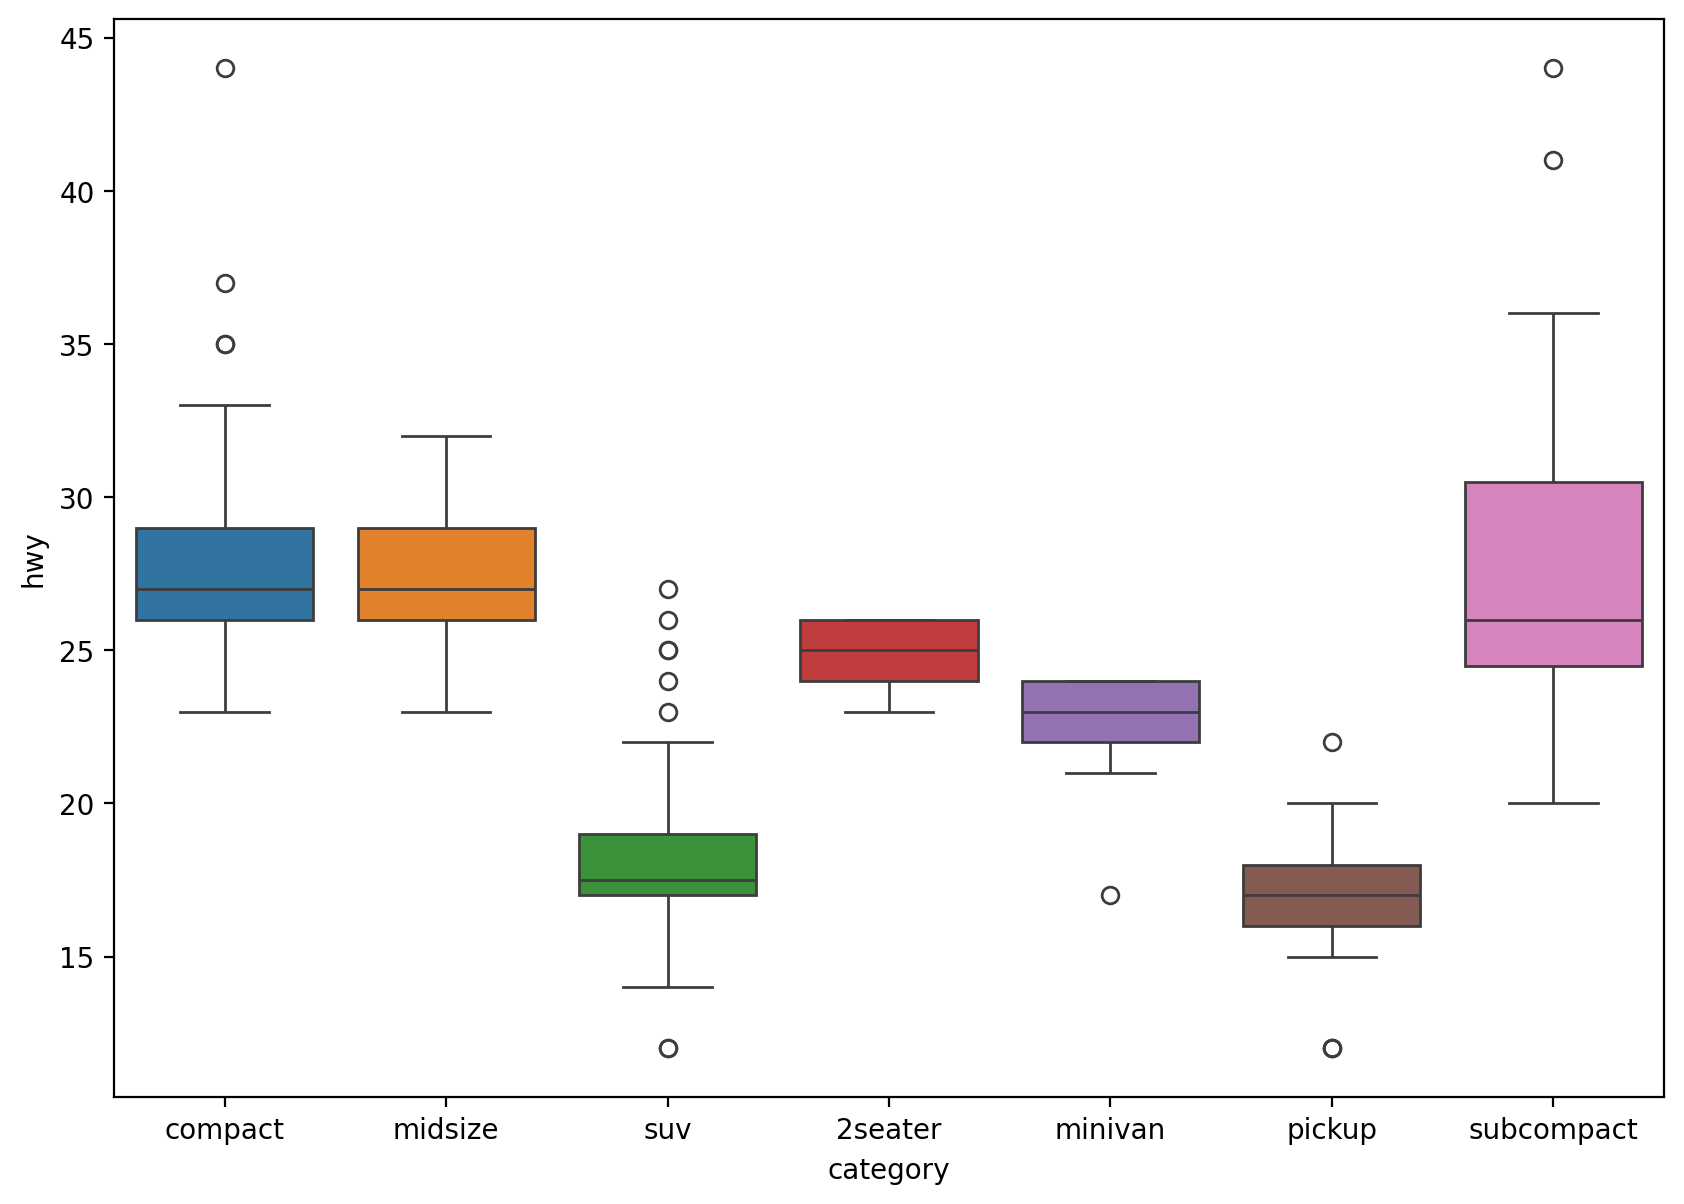

In [198]:
sns.boxplot(mpg, x='category', y='hwy', hue='category')

<Axes: xlabel='drv', ylabel='hwy'>

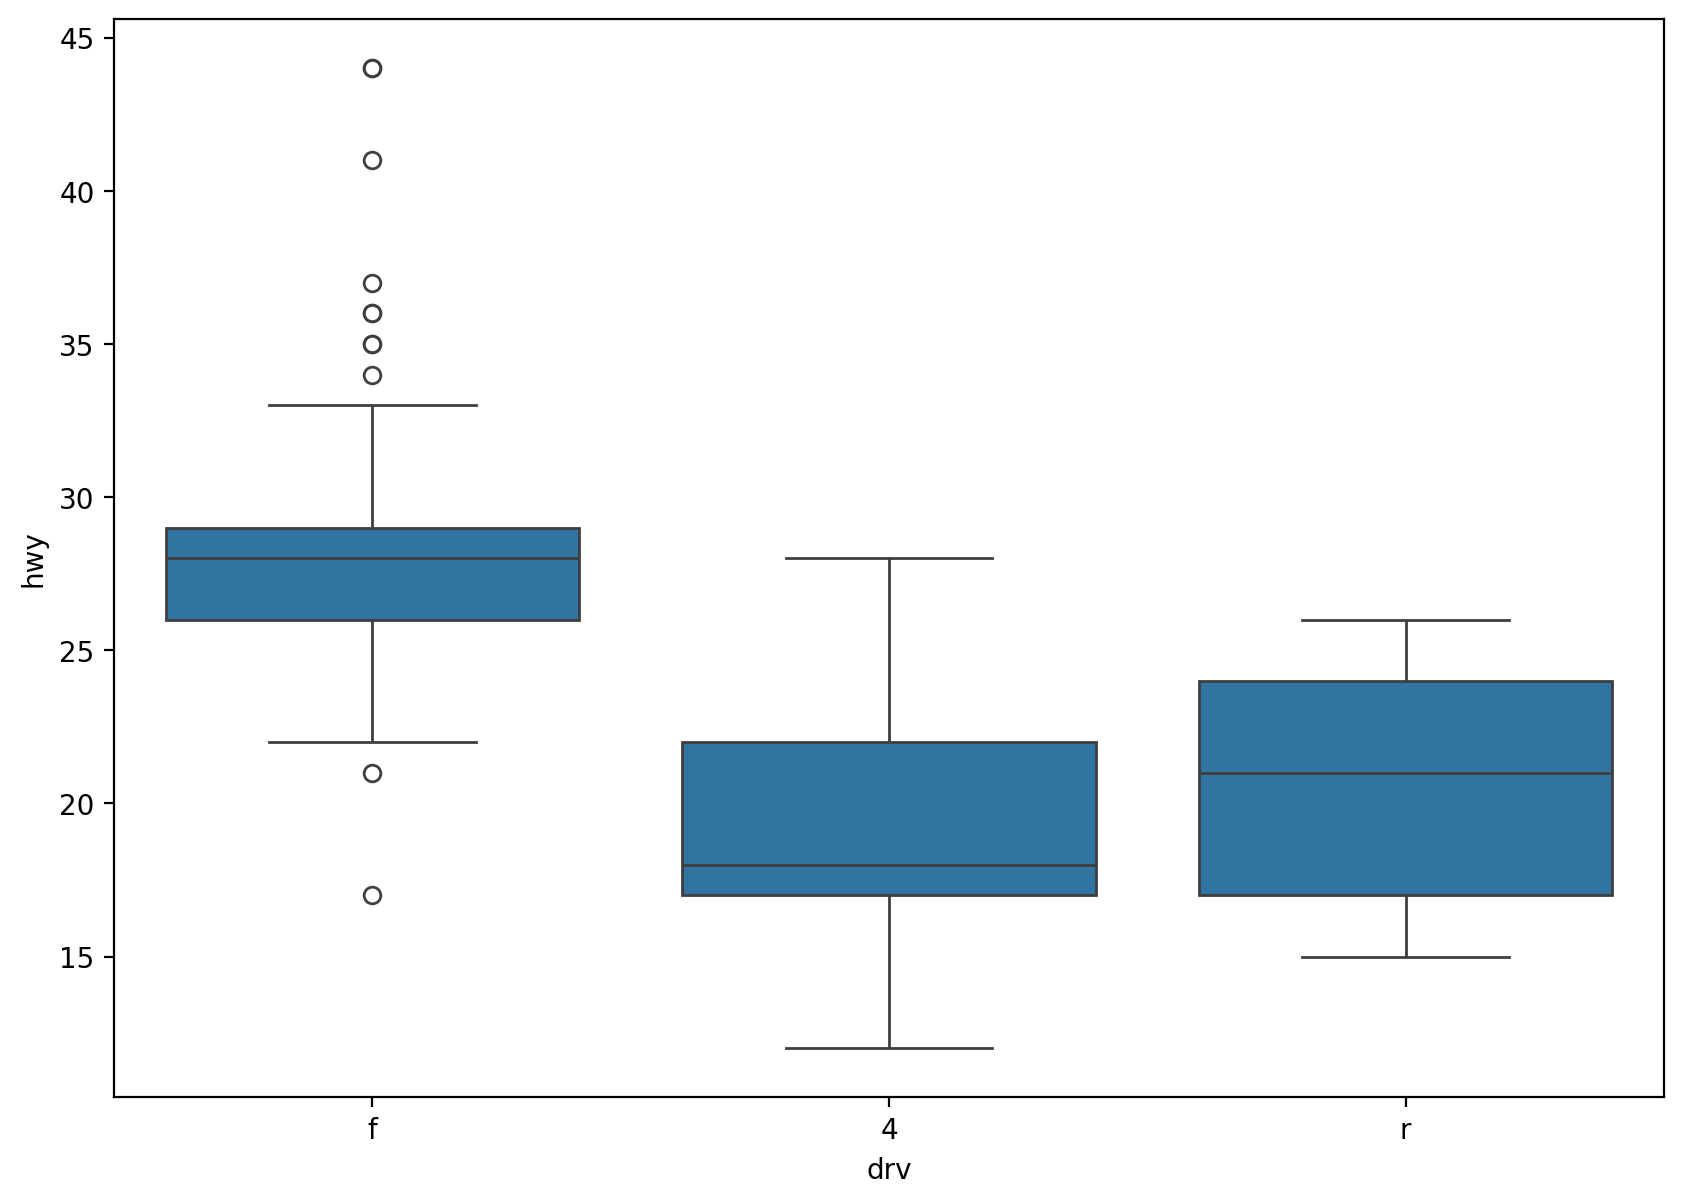

In [199]:
sns.boxplot(mpg, x='drv', y='hwy')

<Axes: xlabel='drv', ylabel='hwy'>

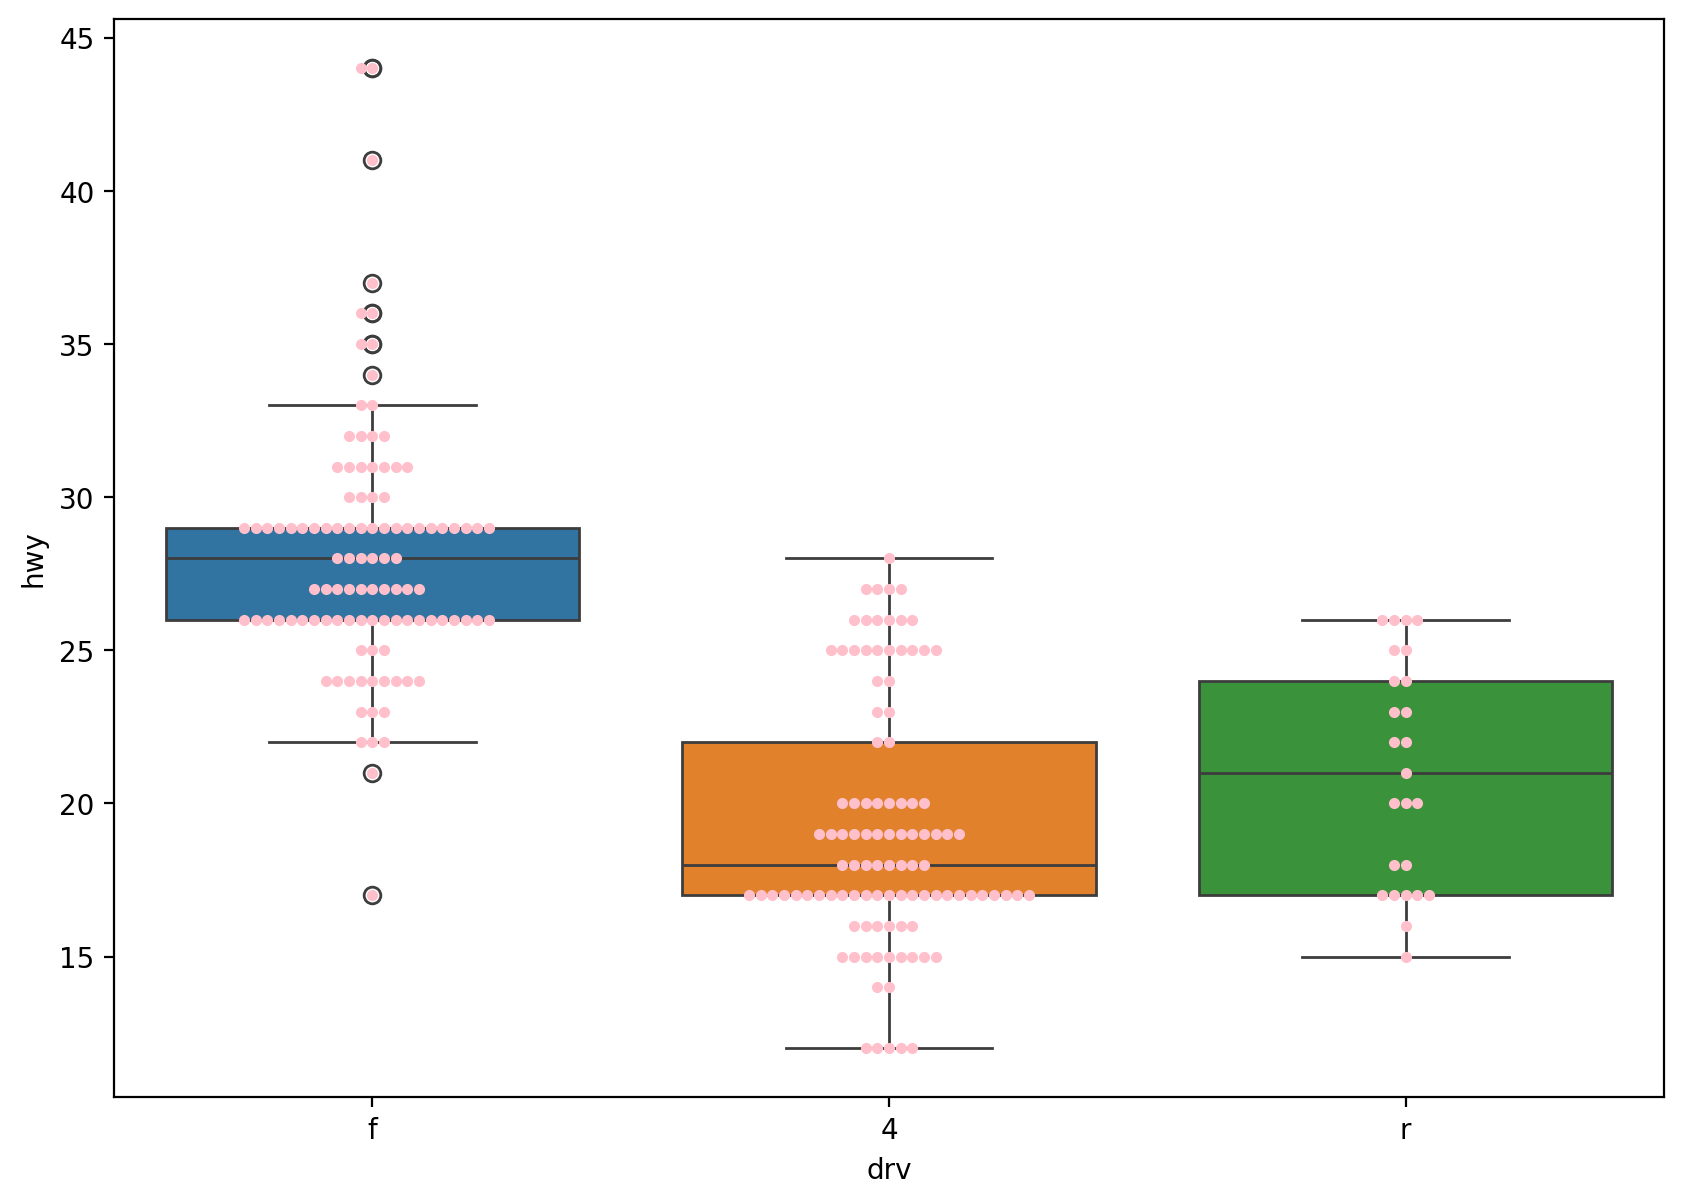

In [207]:
sns.boxplot(mpg, x='drv', y='hwy' ,hue='drv')
sns.swarmplot(mpg, x='drv', y='hwy', color='pink' , size = 4)

In [208]:
from IPython.display import display_html
def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str += df.to_html() +'&nbsp'*4
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [210]:
test1 = pd.DataFrame({'id' :[1,2,3,4,5] , 'midtern': [60,80,70,90,85]})
test2 = pd.DataFrame({'id' :[1,2,3,4,5] , 'final': [70,83,75,95,80]})


In [211]:
test1

,id,midtern
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


In [212]:
test2

,id,final
0,1,70
1,2,83
2,3,75
3,4,95
4,5,80


In [213]:
display_html(test1 , test2)

,id,midtern
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


,id,final
0,1,70
1,2,83
2,3,75
3,4,95
4,5,80


In [214]:
display_html(test1 , test2 , test1.merge(test2, on='id'))

,id,midtern
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85


,id,final
0,1,70
1,2,83
2,3,75
3,4,95
4,5,80


,id,midtern,final
0,1,60,70
1,2,80,83
2,3,70,75
3,4,90,95
4,5,85,80


In [ ]:
from IPython.display import display_html
def display_side_by_side(*args):
    """여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다"""
    html_str=''
    for df in args:
        html_str += df.to_html() + '&nbsp;'*4
    display_html(html_str.replace('table','table style="display:inline"'), raw=True)

# 08 단원 종료